In [1]:
import tensorflow as tf

# check if the gpu is working
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU's:")
    for gpu in gpus:
        print(gpu)
else:
    print("GPU is not found")


GPU is not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

#loading the data
train_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/train'
validation_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/test'

# hyperparameter
batch_size = 32
epochs = 6
image_size = (227, 227)  

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


steps_per_epoch = train_generator.samples // batch_size
validation_steps = max(1, validation_generator.samples // batch_size)

# AlexNet Model
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Save the model
model.save('/content/drive/MyDrive/DeepLearningProject/Saved_Models/alexnet_chest_xray_model_Tina_with_Augmentation.pth')


Found 5276 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 157s 670ms/step - loss: 0.4699 - accuracy: 0.7879 - val_loss: 0.6375 - val_accuracy: 0.6875
Epoch 2/10
164/164 [==============================] - 110s 670ms/step - loss: 0.2448 - accuracy: 0.8959 - val_loss: 0.9273 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 110s 669ms/step - loss: 0.1806 - accuracy: 0.9302 - val_loss: 0.5083 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 109s 665ms/step - loss: 0.1577 - accuracy: 0.9432 - val_loss: 0.3230 - val_accuracy: 0.9375
Epoch 5/10
164/164 [==============================] - 110s 667ms/step - loss: 0.1623 - accuracy: 0.9378 - val_loss: 0.7372 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 110s 669ms/step - loss: 0.1530 - accuracy: 0.9434 - val_loss: 0.2983 - val_accuracy: 0.8750
Epoch 7/10
164/164 [======================

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


train_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/train'
validation_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/test'


batch_size = 32
epochs = 6
image_size = (227, 227)  


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,         
    width_shift_range=0.2,     
    height_shift_range=0.2     
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


steps_per_epoch = train_generator.samples // batch_size
validation_steps = max(1, validation_generator.samples // batch_size)


model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


model.save('/content/drive/MyDrive/DeepLearningProject/Saved_Models/alexnet_chest_xray_model_Tina_with_Augmentation.h5')


Found 5276 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/6
164/164 [==============================] - 116s 638ms/step - loss: 0.4985 - accuracy: 0.7672 - val_loss: 0.5733 - val_accuracy: 0.6250
Epoch 2/6
164/164 [==============================] - 106s 645ms/step - loss: 0.3137 - accuracy: 0.8546 - val_loss: 0.6163 - val_accuracy: 0.7500
Epoch 3/6
164/164 [==============================] - 106s 647ms/step - loss: 0.2916 - accuracy: 0.8772 - val_loss: 1.4047 - val_accuracy: 0.6250
Epoch 4/6
164/164 [==============================] - 106s 643ms/step - loss: 0.2659 - accuracy: 0.8869 - val_loss: 0.4222 - val_accuracy: 0.8750
Epoch 5/6
164/164 [==============================] - 106s 648ms/step - loss: 0.2501 - accuracy: 0.8972 - val_loss: 1.1551 - val_accuracy: 0.6250
Epoch 6/6
164/164 [==============================] - 106s 647ms/step - loss: 0.2209 - accuracy: 0.9102 - val_loss: 0.3154 - val_accuracy: 0.8750
Found 624 images belonging to 2 classes.
19/19 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5276 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/15
82/82 [==============================] - 104s 1s/step - loss: 0.7808 - accuracy: 0.7333 - val_loss: 0.6813 - val_accuracy: 0.5000
Epoch 2/15
82/82 [==============================] - 103s 1s/step - loss: 0.4510 - accuracy: 0.7845 - val_loss: 0.5319 - val_accuracy: 0.7500
Epoch 3/15
82/82 [==============================] - 102s 1s/step - loss: 0.2723 - accuracy: 0.8847 - val_loss: 0.7417 - val_accuracy: 0.6875
Epoch 4/15
82/82 [==============================] - 103s 1s/step - loss: 0.2327 - accuracy: 0.9035 - val_loss: 0.6653 - val_accuracy: 0.6875
Epoch 5/15
82/82 [==============================] - 103s 1s/step - loss: 0.2226 - accuracy: 0.9135 - val_loss: 0.6497 - val_accuracy: 0.7500
Epoch 6/15
82/82 [==============================] - 102s 1s/step - loss: 0.1916 - accuracy: 0.9252 - val_loss: 0.4143 - val_accuracy: 0.7500
Epoch 7/15
82/82 [==============================] - 103s 1s/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


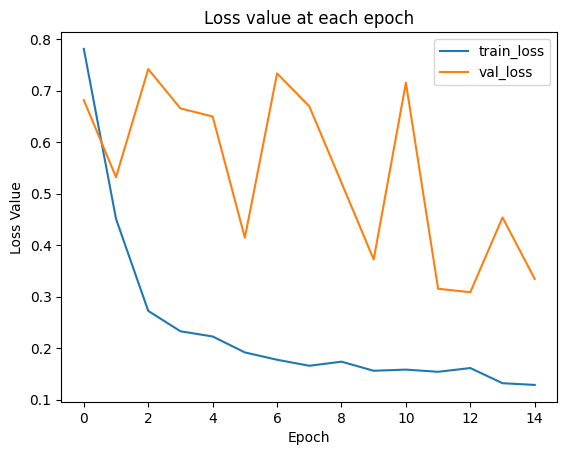

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


train_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/train'
validation_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/DeepLearningProject/chest_xray/chest_xray/test'


batch_size = 64
epochs = 15
image_size = (227, 227)  


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


steps_per_epoch = train_generator.samples // batch_size
validation_steps = max(1, validation_generator.samples // batch_size)


model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Y_pred = model.predict(test_generator, test_generator.samples // batch_size + 1)
y_pred = (Y_pred > 0.5).astype(int)
y_true = test_generator.classes[:len(y_pred)]


print('Classification Report')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


model.save('/content/drive/MyDrive/DeepLearningProject/Saved_Models/alexnet_chest_xray_model_Tina.h5')

# Plotting training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss value at each epoch')
plt.legend()
plt.show()


Found 624 images belonging to 2 classes.
10/10 [==============================] - 6s 527ms/step


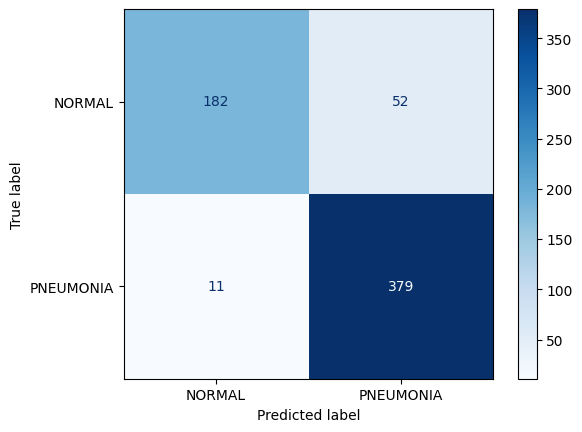

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  
)


Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.where(Y_pred > 0.5, 1, 0).flatten()  


y_true = test_generator.classes


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)

conf_matrix_path = '/content/drive/MyDrive/DeepLearningProject/Graph/Alexnet_Confusion_Matrix.png'
plt.savefig(conf_matrix_path)
plt.show()
